Problem statement

Email Marketing is still the most successful marketing channel and the essential element of any digital marketing strategy. Marketers spend a lot of time in writing that perfect email, labouring over each word, catchy layouts on multiple devices to get them best in-industry open rates & click rates.

How can I build my campaign to increase the click-through rates of email? - a question that is often heard when marketers are creating their email marketing plans.

Can we optimize our email marketing campaigns with Data Science?

It's time to unlock marketing potential and build some exceptional data-science products for email marketing.

Analytics Vidhya sends out marketing emailers for various events such as conferences, hackathons, etc. We have provided a sample of user-email interaction data from July 2017 to December 2017. You are required to predict the click probability of links inside a mailer for email campaigns from January 2018 to March 2018.

Import libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load files

In [82]:
#read files
#Reading train file:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/email_train.csv')
#Reading test file:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/email_test.csv')
#Reading sample submission file:
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/email_sample.csv')
#Reading data file:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/email_campaign_data.csv')

In [83]:
train

,id,user_id,campaign_id,send_date,is_open,is_click
0,42_14051,14051,42,01-09-2017 19:55,0,0
1,52_134438,134438,52,02-11-2017 12:53,0,0
2,33_181789,181789,33,24-07-2017 15:15,0,0
3,44_231448,231448,44,05-09-2017 11:36,0,0
4,29_185580,185580,29,01-07-2017 18:01,0,0
...,...,...,...,...,...,...
1023186,29_232613,232613,29,01-07-2017 18:04,0,0
1023187,48_119204,119204,48,02-10-2017 10:23,1,0
1023188,33_235406,235406,33,26-07-2017 09:37,1,1
1023189,53_183424,183424,53,06-11-2017 22:53,0,0


In [84]:
test

,id,campaign_id,user_id,send_date
0,63_122715,63,122715,01-02-2018 22:35
1,56_76206,56,76206,02-01-2018 08:15
2,57_96189,57,96189,05-01-2018 18:25
3,56_166917,56,166917,02-01-2018 08:15
4,56_172838,56,172838,02-01-2018 08:12
...,...,...,...,...
773853,74_202929,74,202929,01-03-2018 21:19
773854,56_95437,56,95437,02-01-2018 08:10
773855,63_11063,63,11063,01-02-2018 22:55
773856,72_144182,72,144182,22-02-2018 16:10


In [85]:
sample

,id,is_click
0,63_122715,0
1,56_76206,0
2,57_96189,0
3,56_166917,0
4,56_172838,0
...,...,...
773853,74_202929,0
773854,56_95437,0
773855,63_11063,0
773856,72_144182,0


In [86]:
data

,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,29,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
1,30,Upcoming Events,18,14,7,1,"Dear AVians,\r\n \r\nAre your eager to know wh...",[July] Data Science Expert Meetups & Competiti...,http://r.newsletters.analyticsvidhya.com/7up0e...
2,31,Conference,15,13,5,1,Early Bird Pricing Till August 07  Save upto ...,Last chance to convince your boss before the E...,http://r.newsletters.analyticsvidhya.com/7usym...
3,32,Conference,24,19,7,1,\r\n \r\nHi ?\r\n \r\nBefore I dive into why y...,A.I. & Machine Learning: 5 reasons why you sho...,http://r.newsletters.analyticsvidhya.com/7uthl...
4,33,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...
5,34,Newsletter,75,64,12,4,"\r\nAugust Newsletter\r\n \r\nDear AVians,\r\n...","[AV Newsletter] Fireside Chat with DJ Patil, D...",http://r.newsletters.analyticsvidhya.com/7uwwu...
6,35,Others,9,2,1,1,Fireside Chat with DJ Patil - Watch Live!\r\n ...,Watch Live: Fireside Chat with DJ Patil,http://r.newsletters.analyticsvidhya.com/7ux6c...
7,36,Conference,13,11,2,1,Announcing Dr. Kirk Borne as Keynote Speaker\r...,"Dr Kirk Borne of Booz Allen Hamilton, to keyno...",http://r.newsletters.analyticsvidhya.com/7uxpa...
8,37,Conference,9,7,3,1,Last day to save maximum on tickets\r\n \r\n15...,[Last Day] Early Bird Offer on conference pass...,http://r.newsletters.analyticsvidhya.com/7uyr8...
9,38,Conference,28,26,12,3,Early Bird Pricing expires on August 07\r\n \r...,Early Bird offer expires in 2 Days. Save your ...,http://r.newsletters.analyticsvidhya.com/7uz0p...


Merge train with data

In [87]:
train = train.merge(data, on="campaign_id", how='left' )
train

,id,user_id,campaign_id,send_date,is_open,is_click,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,42_14051,14051,42,01-09-2017 19:55,0,0,Newsletter,88,79,13,4,"September Newsletter\r\n \r\nDear AVians,\r\n ...",[September] Exciting days ahead with DataHack ...,http://r.newsletters.analyticsvidhya.com/7v3rd...
1,52_134438,134438,52,02-11-2017 12:53,0,0,Newsletter,67,62,10,4,"November Newsletter\r\n \r\nDear AVians,\r\n \...",[Newsletter] Stage for DataHack Summit 2017 is...,http://r.newsletters.analyticsvidhya.com/7vtb2...
2,33_181789,181789,33,24-07-2017 15:15,0,0,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...
3,44_231448,231448,44,05-09-2017 11:36,0,0,Upcoming Events,60,56,19,6,"[September Events]\r\n \r\nDear AVians,\r\n \r...","[September] Data Science Hackathons, Meetups a...",http://r.newsletters.analyticsvidhya.com/7veam...
4,29_185580,185580,29,01-07-2017 18:01,0,0,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023186,29_232613,232613,29,01-07-2017 18:04,0,0,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
1023187,48_119204,119204,48,02-10-2017 10:23,1,0,Newsletter,203,191,12,4,"\r\nOctober Newsletter\r\n \r\nDear AVians,\r\...",[October 2017] - Just a month to go! DataHack ...,http://r.newsletters.analyticsvidhya.com/7vlxl...
1023188,33_235406,235406,33,26-07-2017 09:37,1,1,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...
1023189,53_183424,183424,53,06-11-2017 22:53,0,0,Conference,104,100,13,1,3 DAYS | 30 TALKS | 10 HACK SESSIONS | 6 WORKS...,[Register Now] Just 2 days to go for India's b...,http://r.newsletters.analyticsvidhya.com/7vv5g...


In [88]:
test = test.merge(data, on="campaign_id", how='left' )
test

,id,campaign_id,user_id,send_date,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,63_122715,63,122715,01-02-2018 22:35,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
1,56_76206,56,76206,02-01-2018 08:15,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,http://r.newsletters.analyticsvidhya.com/7w3uc...
2,57_96189,57,96189,05-01-2018 18:25,Upcoming Events,40,36,15,4,"[January - Hiring Hackathons, LearnUps, Contes...","[January 2018] Upcoming Hiring Hackathons, Lea...",http://r.newsletters.analyticsvidhya.com/7w43t...
3,56_166917,56,166917,02-01-2018 08:15,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,http://r.newsletters.analyticsvidhya.com/7w3uc...
4,56_172838,56,172838,02-01-2018 08:12,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,http://r.newsletters.analyticsvidhya.com/7w3uc...
...,...,...,...,...,...,...,...,...,...,...,...,...
773853,74_202929,74,202929,01-03-2018 21:19,Newsletter,140,130,15,4,"March 2018 Newsletter\r\n \r\nDear Avian,\r\n\...","[March Newsletter] AV Android App, DataHack Pr...",http://r.newsletters.analyticsvidhya.com/7ww0u...
773854,56_95437,56,95437,02-01-2018 08:10,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,http://r.newsletters.analyticsvidhya.com/7w3uc...
773855,63_11063,63,11063,01-02-2018 22:55,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...
773856,72_144182,72,144182,22-02-2018 16:10,Corporate,22,15,5,1,\r\nAVBytes: Top Stories On Analytics Vidhya T...,Missing out on the latest happenings in AI? Ch...,http://r.newsletters.analyticsvidhya.com/7wra6...


Check for null values

In [89]:
train.isnull().sum()

id                      0
user_id                 0
campaign_id             0
send_date               0
is_open                 0
is_click                0
communication_type      0
total_links             0
no_of_internal_links    0
no_of_images            0
no_of_sections          0
email_body              0
subject                 0
email_url               0
dtype: int64

In [90]:
test.isnull().sum()

id                      0
campaign_id             0
user_id                 0
send_date               0
communication_type      0
total_links             0
no_of_internal_links    0
no_of_images            0
no_of_sections          0
email_body              0
subject                 0
email_url               0
dtype: int64

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023191 entries, 0 to 1023190
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   id                    1023191 non-null  object
 1   user_id               1023191 non-null  int64 
 2   campaign_id           1023191 non-null  int64 
 3   send_date             1023191 non-null  object
 4   is_open               1023191 non-null  int64 
 5   is_click              1023191 non-null  int64 
 6   communication_type    1023191 non-null  object
 7   total_links           1023191 non-null  int64 
 8   no_of_internal_links  1023191 non-null  int64 
 9   no_of_images          1023191 non-null  int64 
 10  no_of_sections        1023191 non-null  int64 
 11  email_body            1023191 non-null  object
 12  subject               1023191 non-null  object
 13  email_url             1023191 non-null  object
dtypes: int64(8), object(6)
memory usage: 117.1+ MB


Grapgical representation of data

In [92]:
open = train.groupby('is_open')['is_open'].count()
open/len(train)*100

is_open
0    89.953977
1    10.046023
Name: is_open, dtype: float64

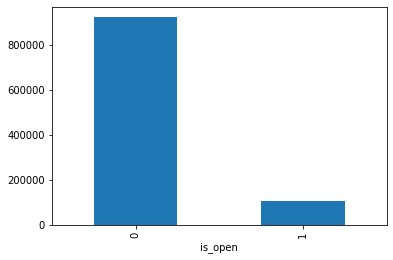

In [93]:
train.groupby('is_open').is_open.count().plot.bar(ylim=0)
plt.show()

In [94]:
click = train.groupby('is_click')['is_click'].count()
click/len(train)*100

is_click
0    98.750771
1     1.249229
Name: is_click, dtype: float64

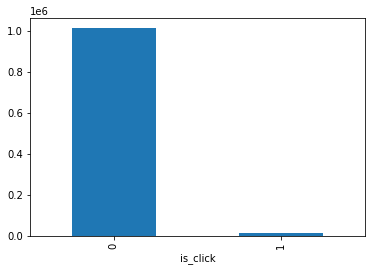

In [95]:
train.groupby('is_click').is_click.count().plot.bar(ylim=0)
plt.show()

In [96]:
link = train.groupby('total_links')['total_links'].sum()
link/len(train)*100

total_links
7        42.394431
8        14.161188
9        13.340911
10        4.712708
11        0.072030
13       93.276329
14        3.811996
15        4.679478
18      122.714918
24      163.310271
28       19.790635
60      231.616580
63      578.426609
67      990.661861
75      535.911672
88      698.820064
104     868.344620
109     423.028545
119     946.216493
203    1020.881536
Name: total_links, dtype: float64

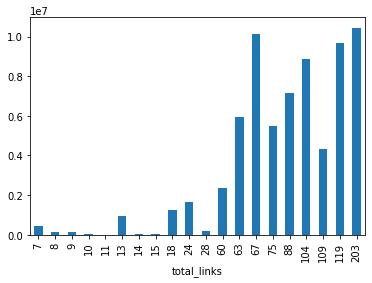

In [97]:
train.groupby('total_links').total_links.sum().plot.bar(ylim=0)
plt.show()

In [98]:
link1 = train.groupby('no_of_internal_links')['no_of_internal_links'].sum()
link1/len(train)*100

no_of_internal_links
2        0.805519
3       18.169042
4        8.443780
7        5.217208
8        3.770166
10       2.722854
11      78.926124
13       4.055548
14      95.444936
19     129.287298
26      18.377019
56     216.175475
58     532.519735
61     412.129211
62     497.846443
64     457.311294
79     627.349830
100    834.946750
105    407.504562
117    930.313695
191    960.533859
Name: no_of_internal_links, dtype: float64

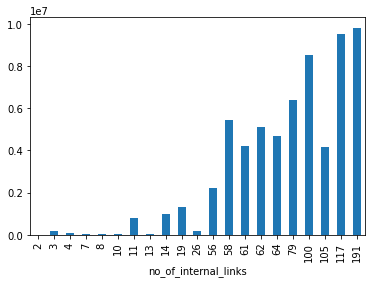

In [99]:
train.groupby('no_of_internal_links').no_of_internal_links.sum().plot.bar(ylim=0)
plt.show()

In [100]:
image = train.groupby('no_of_images')['no_of_images'].sum()
image/len(train)*100

no_of_images
1       4.978152
2      23.021117
3       2.235946
5       1.559826
7      95.354631
8      73.450998
10     80.297813
12    235.649844
13    211.777860
16    127.222386
17     65.976929
19     73.345250
Name: no_of_images, dtype: float64

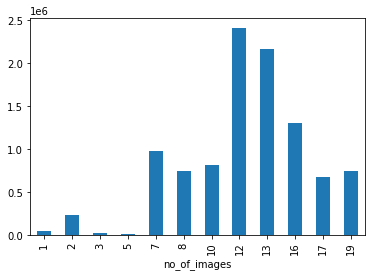

In [101]:
train.groupby('no_of_images').no_of_images.sum().plot.bar(ylim=0)
plt.show()

In [102]:
section = train.groupby('no_of_sections')['no_of_sections'].sum()
section/len(train)*100

no_of_sections
1     47.468948
3     22.389075
4    149.307021
6     46.447633
Name: no_of_sections, dtype: float64

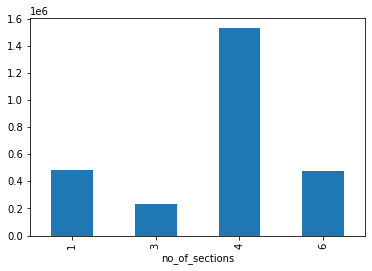

In [103]:
train.groupby('no_of_sections').no_of_sections.sum().plot.bar(ylim=0)
plt.show()

Convert date to columns

In [104]:
train.head(2)

,id,user_id,campaign_id,send_date,is_open,is_click,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,42_14051,14051,42,01-09-2017 19:55,0,0,Newsletter,88,79,13,4,"September Newsletter\r\n \r\nDear AVians,\r\n ...",[September] Exciting days ahead with DataHack ...,http://r.newsletters.analyticsvidhya.com/7v3rd...
1,52_134438,134438,52,02-11-2017 12:53,0,0,Newsletter,67,62,10,4,"November Newsletter\r\n \r\nDear AVians,\r\n \...",[Newsletter] Stage for DataHack Summit 2017 is...,http://r.newsletters.analyticsvidhya.com/7vtb2...


In [105]:
train['day'] = train['send_date'].str[:2]
test['day'] = test['send_date'].str[:2]

train.day = train.day.astype(int)
test.day = test.day.astype(int)

train['month'] = train['send_date'].str[3:5]
test['month'] = test['send_date'].str[3:5]

train.month = train.month.astype(int)
test.month = test.month.astype(int)

#train['year'] = train['send_date'].str[6:11]
#test['year'] = test['send_date'].str[6:11]

#train.year = train.year.astype(int)
#test.year = test.year.astype(int)

train['hour'] = train['send_date'].str[11:13]
test['hour'] = test['send_date'].str[11:13]

train.hour = train.hour.astype(int)
test.hour = test.hour.astype(int)

train['minute'] = train['send_date'].str[14:16]
test['minute'] = test['send_date'].str[14:16]

train.minute = train.minute.astype(int)
test.minute = test.minute.astype(int)

#train['second'] = train['send_date'].str[17:19]
#test['second'] = test['send_date'].str[17:19]

#train.second = train.second.astype(int)
#test.second = test.second.astype(int)

train.head(3)

,id,user_id,campaign_id,send_date,is_open,is_click,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,day,month,hour,minute
0,42_14051,14051,42,01-09-2017 19:55,0,0,Newsletter,88,79,13,4,"September Newsletter\r\n \r\nDear AVians,\r\n ...",[September] Exciting days ahead with DataHack ...,http://r.newsletters.analyticsvidhya.com/7v3rd...,1,9,19,55
1,52_134438,134438,52,02-11-2017 12:53,0,0,Newsletter,67,62,10,4,"November Newsletter\r\n \r\nDear AVians,\r\n \...",[Newsletter] Stage for DataHack Summit 2017 is...,http://r.newsletters.analyticsvidhya.com/7vtb2...,2,11,12,53
2,33_181789,181789,33,24-07-2017 15:15,0,0,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...,24,7,15,15


Define X1, y1, and X1_test variables

In [106]:
id = test.id

open_train = train.is_open

click_train = train.is_click

features1 = ['communication_type','total_links','no_of_internal_links', 'no_of_images', 'no_of_sections', 'subject', 'day', 'month', 'hour', 'minute' ]

y1 = train.is_open
X1 = train[features1]
X1_test = test[features1]

In [107]:
y1

0          0
1          0
2          0
3          0
4          0
          ..
1023186    0
1023187    1
1023188    1
1023189    0
1023190    0
Name: is_open, Length: 1023191, dtype: int64

In [108]:
X1_test

,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,subject,day,month,hour,minute
0,Newsletter,68,64,15,5,"AVbytes, Ultimate 2018 learning path and aweso...",1,2,22,35
1,Newsletter,42,38,10,4,[January] Year 2018 - Bigger & Exciting challe...,2,1,8,15
2,Upcoming Events,40,36,15,4,"[January 2018] Upcoming Hiring Hackathons, Lea...",5,1,18,25
3,Newsletter,42,38,10,4,[January] Year 2018 - Bigger & Exciting challe...,2,1,8,15
4,Newsletter,42,38,10,4,[January] Year 2018 - Bigger & Exciting challe...,2,1,8,12
...,...,...,...,...,...,...,...,...,...,...
773853,Newsletter,140,130,15,4,"[March Newsletter] AV Android App, DataHack Pr...",1,3,21,19
773854,Newsletter,42,38,10,4,[January] Year 2018 - Bigger & Exciting challe...,2,1,8,10
773855,Newsletter,68,64,15,5,"AVbytes, Ultimate 2018 learning path and aweso...",1,2,22,55
773856,Corporate,22,15,5,1,Missing out on the latest happenings in AI? Ch...,22,2,16,10


Create column transformer

In [109]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023191 entries, 0 to 1023190
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   communication_type    1023191 non-null  object
 1   total_links           1023191 non-null  int64 
 2   no_of_internal_links  1023191 non-null  int64 
 3   no_of_images          1023191 non-null  int64 
 4   no_of_sections        1023191 non-null  int64 
 5   subject               1023191 non-null  object
 6   day                   1023191 non-null  int64 
 7   month                 1023191 non-null  int64 
 8   hour                  1023191 non-null  int64 
 9   minute                1023191 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 85.9+ MB


In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numeric_features = [1, 2, 3, 4, 6, 7, 8, 9]
numeric_transformer = Pipeline(steps=[('imputer', IterativeImputer(random_state=1)),
    ('scaler', StandardScaler())])

categorical_features = [0, 5]
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

Split X1 for training and validation

In [111]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, random_state=1, test_size=0.10, shuffle=True)
X1_train.shape, X1_val.shape, y1_train.shape, y1_val.shape, X1_test.shape

((920871, 10), (102320, 10), (920871,), (102320,), (773858, 10))

Create first pipeline

In [112]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LogisticRegression(class_weight='balanced', max_iter=2000, random_state=1, solver='saga', C=100))])
model.fit(X1_train, y1_train)
print(model.score(X1_train, y1_train))

0.6377831422642259


Predict on validation set

In [113]:
y1_pred = model.predict(X1_val)
print(model.score(X1_val, y1_val))

0.6374022673964035


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


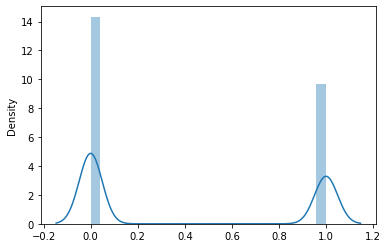

In [114]:
sns.distplot(y1_pred)

In [115]:
from collections import Counter

print(Counter(y1_pred))

Counter({0: 61102, 1: 41218})


Predict on test set

In [116]:
prediction1 = model.predict(X1_test)
prediction1

array([1, 0, 0, ..., 1, 0, 0])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


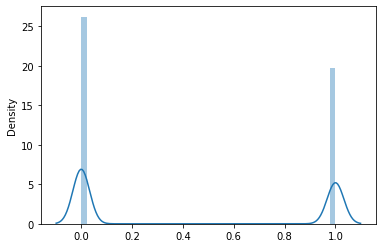

In [117]:
sns.distplot(prediction1)

In [118]:
print(Counter(prediction1))

Counter({0: 441377, 1: 332481})


Create new column on test

In [119]:
test['is_open'] = prediction1
test

,id,campaign_id,user_id,send_date,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,day,month,hour,minute,is_open
0,63_122715,63,122715,01-02-2018 22:35,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...,1,2,22,35,1
1,56_76206,56,76206,02-01-2018 08:15,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,http://r.newsletters.analyticsvidhya.com/7w3uc...,2,1,8,15,0
2,57_96189,57,96189,05-01-2018 18:25,Upcoming Events,40,36,15,4,"[January - Hiring Hackathons, LearnUps, Contes...","[January 2018] Upcoming Hiring Hackathons, Lea...",http://r.newsletters.analyticsvidhya.com/7w43t...,5,1,18,25,0
3,56_166917,56,166917,02-01-2018 08:15,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,http://r.newsletters.analyticsvidhya.com/7w3uc...,2,1,8,15,0
4,56_172838,56,172838,02-01-2018 08:12,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,http://r.newsletters.analyticsvidhya.com/7w3uc...,2,1,8,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773853,74_202929,74,202929,01-03-2018 21:19,Newsletter,140,130,15,4,"March 2018 Newsletter\r\n \r\nDear Avian,\r\n\...","[March Newsletter] AV Android App, DataHack Pr...",http://r.newsletters.analyticsvidhya.com/7ww0u...,1,3,21,19,0
773854,56_95437,56,95437,02-01-2018 08:10,Newsletter,42,38,10,4,\r\nJanuary 2018 Newsletter\r\n \r\nDear AVian...,[January] Year 2018 - Bigger & Exciting challe...,http://r.newsletters.analyticsvidhya.com/7w3uc...,2,1,8,10,0
773855,63_11063,63,11063,01-02-2018 22:55,Newsletter,68,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...,1,2,22,55,1
773856,72_144182,72,144182,22-02-2018 16:10,Corporate,22,15,5,1,\r\nAVBytes: Top Stories On Analytics Vidhya T...,Missing out on the latest happenings in AI? Ch...,http://r.newsletters.analyticsvidhya.com/7wra6...,22,2,16,10,0


Define X2, y2 and X2_test

In [120]:
features2 = ['communication_type','total_links','no_of_internal_links', 'no_of_images', 'no_of_sections', 'subject', 'day', 'month', 'hour', 'minute', 'is_open' ]

y2 = train.is_click
X2 = train[features2]
X2_test = test[features2]

Create column transformer

In [121]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023191 entries, 0 to 1023190
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   communication_type    1023191 non-null  object
 1   total_links           1023191 non-null  int64 
 2   no_of_internal_links  1023191 non-null  int64 
 3   no_of_images          1023191 non-null  int64 
 4   no_of_sections        1023191 non-null  int64 
 5   subject               1023191 non-null  object
 6   day                   1023191 non-null  int64 
 7   month                 1023191 non-null  int64 
 8   hour                  1023191 non-null  int64 
 9   minute                1023191 non-null  int64 
 10  is_open               1023191 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 93.7+ MB


In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numeric_features = [1, 2, 3, 4, 6, 7, 8, 9, 10]
numeric_transformer = Pipeline(steps=[('imputer', IterativeImputer(random_state=1)),
    ('scaler', StandardScaler())])

categorical_features = [0, 5]
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

Split X2 for training and validation

In [123]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, random_state=1, test_size=0.10, shuffle=True)
X2_train.shape, X2_val.shape, y2_train.shape, y2_val.shape, X2_test.shape

((920871, 11), (102320, 11), (920871,), (102320,), (773858, 11))

Create second pipeline

In [124]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LogisticRegression(class_weight='balanced', max_iter=2000, random_state=1, solver='saga', C=100))])
model.fit(X2_train, y2_train)
print(model.score(X2_train, y2_train))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9118660485562039


Predict on validation set

In [125]:
y2_pred = model.predict(X2_val)
print(model.score(X2_val, y2_val))

0.9135261923377639


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


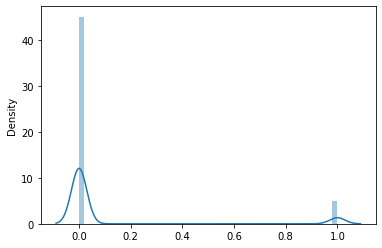

In [126]:
sns.distplot(y2_pred)

In [127]:
print(Counter(y2_pred))

Counter({0: 92177, 1: 10143})


Predict on Test set

In [128]:
prediction2 = model.predict(X2_test)
prediction2

array([1, 0, 0, ..., 1, 0, 0])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


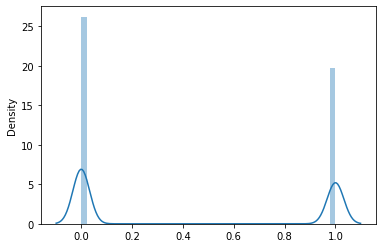

In [129]:
sns.distplot(prediction2)

In [130]:
print(Counter(prediction2))

Counter({0: 441377, 1: 332481})


Prepare submission

In [131]:
sample

,id,is_click
0,63_122715,0
1,56_76206,0
2,57_96189,0
3,56_166917,0
4,56_172838,0
...,...,...
773853,74_202929,0
773854,56_95437,0
773855,63_11063,0
773856,72_144182,0


In [133]:
output = pd.DataFrame({'id': id, 'is_click': prediction2})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [134]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

,id,is_click
0,63_122715,1
1,56_76206,0
2,57_96189,0
3,56_166917,0
4,56_172838,0
...,...,...
773853,74_202929,0
773854,56_95437,0
773855,63_11063,1
773856,72_144182,0
